In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_ta as ta 

In [10]:
df=yf.download('TITAN.BO',start ="2020-01-01",end=None)
df.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1196.400024,1199.050049,1152.300049,1154.849976,1154.849976,130373
2020-01-02,1154.500000,1159.250000,1140.000000,1155.449951,1155.449951,95694
2020-01-03,1155.050049,1156.000000,1132.000000,1139.500000,1139.500000,70128
2020-01-06,1159.650024,1170.000000,1150.000000,1158.349976,1158.349976,172246
2020-01-07,1169.000000,1172.000000,1152.000000,1159.900024,1159.900024,102829


In [11]:
df['SMA10']=df.Close.rolling(10).mean()
df['SMA50']=df.Close.rolling(50).mean()
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA50
Date,,,,,,,,
2020-03-12,1169.000000,1169.000000,1065.000000,1078.199951,1078.199951,105799,1225.050012,1220.903005
2020-03-13,1030.000000,1139.250000,945.049988,1084.099976,1084.099976,172825,1205.460010,1219.488005
2020-03-16,1064.000000,1064.000000,983.349976,1011.150024,1011.150024,113067,1181.100012,1216.602007
2020-03-17,1000.000000,1038.000000,978.500000,1001.700012,1001.700012,90757,1156.920013,1213.846007
2020-03-18,1011.150024,1027.500000,921.000000,930.400024,930.400024,243124,1125.255011,1209.287008
...,...,...,...,...,...,...,...,...
2024-06-14,3476.550049,3534.000000,3476.550049,3527.600098,3527.600098,38848,3379.380005,3467.561987
2024-06-18,3535.000000,3625.000000,3535.000000,3586.199951,3586.199951,43767,3411.875000,3464.151987
2024-06-19,3604.050049,3604.050049,3455.000000,3461.649902,3461.649902,50755,3434.064990,3459.124985


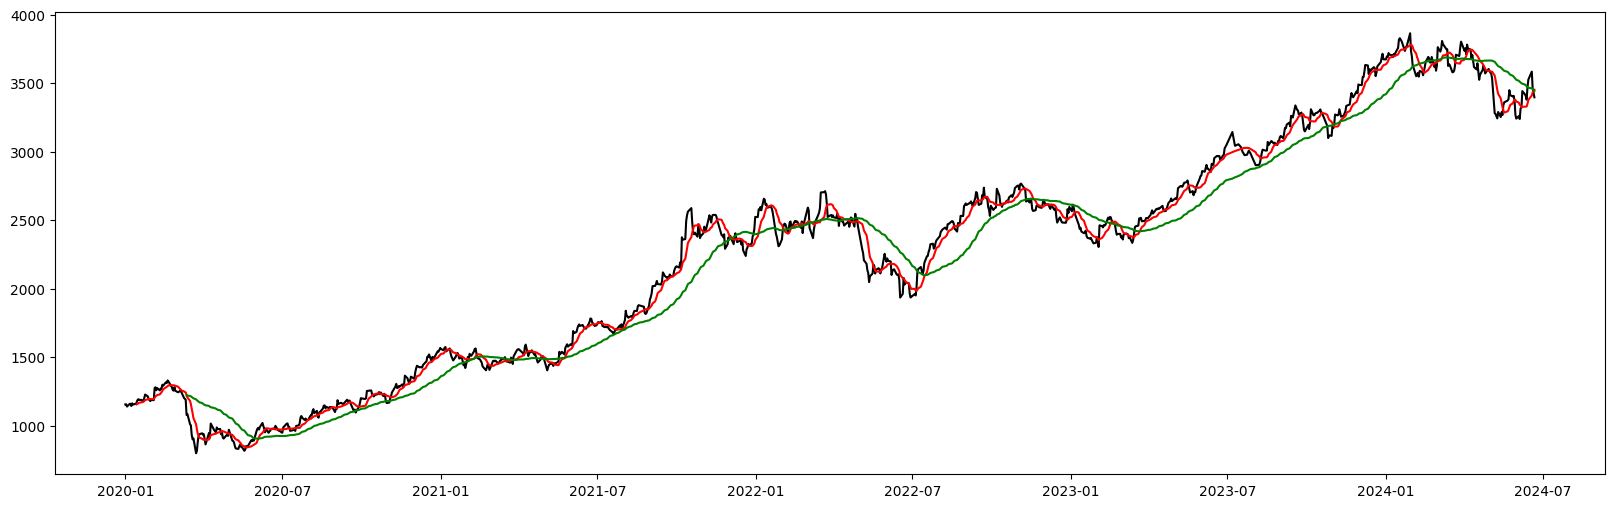

In [13]:
plt.figure(figsize=(20,6))
plt.plot(df.Close,color='black')
plt.plot(df.SMA10,color='red')
plt.plot(df.SMA50,color='green')

In [14]:
def tradedf(df1):
    df1.reset_index(inplace=True)
    Flag = False
    buyframe=pd.DataFrame(columns=['Date','BuyPrice','Action'])
    sellframe=pd.DataFrame(columns=['Date','SellPrice','Action'])
    for i,row in df1.iterrows():
        if not Flag:
            if df1.SMA10.iloc[i] > df1.SMA50.iloc[i]  and df1.SMA10.iloc[i-1] < df1.SMA50.iloc[i-1]:
                    
                Flag=True
                buyframe= buyframe.append({'Date': row.Date,'BuyPrice': buyprice, 'Action': 'Buy'}, ignore_index=True)
        if Flag:
            if df1.SMA10.iloc[i] < df1.SMA50.iloc[i]  and df1.SMA10.iloc[i-1] > df1.SMA50.iloc[i-1]:
                sellprice = row.Close   
                Flag=False            
                sellframe= sellframe.append({'Date': row.Date,'SellPrice': sellprice, 'Action': 'Sell'}, ignore_index=True)
    tradedf=pd.concat([buyframe,sellframe],axis=1)
    tradedf.dropna()
    tradedf['profit']=tradedf['SellPrice']-tradedf['BuyPrice']
    totalProfit = tradedf['profit'].sum()
    print(f"Total profit from this strategy was {totalProfit}")
    return tradedf

In [16]:
import warnings
warnings.filterwarnings('ignore')
tradedf(df)

Total profit from this strategy was 1602.9501342773438


,Date,BuyPrice,Action,Date,SellPrice,Action,profit
0,2020-06-04,971.450012,Buy,2021-02-18,1434.400024,Sell,462.950012
1,2021-03-26,1506.099976,Buy,2021-05-04,1403.800049,Sell,-102.299927
2,2021-05-25,1569.300049,Buy,2021-12-03,2369.550049,Sell,800.250000
3,2022-01-04,2579.649902,Buy,2022-02-03,2475.449951,Sell,-104.199951
4,2022-02-11,2442.149902,Buy,2022-03-07,2389.750000,Sell,-52.399902
5,2022-03-21,2705.699951,Buy,2022-04-18,2491.399902,Sell,-214.300049
6,2022-07-18,2236.850098,Buy,2022-11-21,2573.600098,Sell,336.750000
7,2023-02-16,2522.100098,Buy,2023-02-28,2374.199951,Sell,-147.900146
8,2023-03-22,2507.699951,Buy,2023-11-01,3173.850098,Sell,666.150146
9,2023-11-10,3256.350098,Buy,2024-02-09,3590.600098,Sell,334.250000


#### fOR MANY TICKERS